In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [170]:
directory = "/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o5_180s/"
#file = "HFFZ_fullycp-receiver-00039-00031.dat"
#file = "HFFZ_fullycp-receiver-00116-00014.dat"
file = "HFFZ_fullycp-receiver-00164-00011.dat"

In [171]:
column_names = ["Time","xx","yy","zz","xy","yz","xz","u","v","w"]

In [172]:
df = pd.read_csv(directory+file, skiprows=5, sep='\s+', names=column_names)
df.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
df.head()

,Time,u,v,w
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
1,0.1,0.000000e+00,0.000000e+00,0.000000e+00
2,0.2,0.000000e+00,0.000000e+00,0.000000e+00
3,0.3,1.658069e-132,5.827383e-132,-1.062238e-131
4,0.4,6.498836e-97,2.962924e-96,-1.470703e-96


In [173]:
coords = pd.read_csv(directory+file, nrows=3, skiprows=2, header=None, sep="\s+") #names=["x1", "x2", "x3"]
x1 = coords[2][0]
x2 = coords[2][1]
x3 = coords[2][2]

In [174]:
df["x1"]=x1
df["x2"]=x2
df["x3"]=x3
df.head()

,Time,u,v,w,x1,x2,x3
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,630893.0,7357970.0,0.0
1,0.1,0.000000e+00,0.000000e+00,0.000000e+00,630893.0,7357970.0,0.0
2,0.2,0.000000e+00,0.000000e+00,0.000000e+00,630893.0,7357970.0,0.0
3,0.3,1.658069e-132,5.827383e-132,-1.062238e-131,630893.0,7357970.0,0.0
4,0.4,6.498836e-97,2.962924e-96,-1.470703e-96,630893.0,7357970.0,0.0


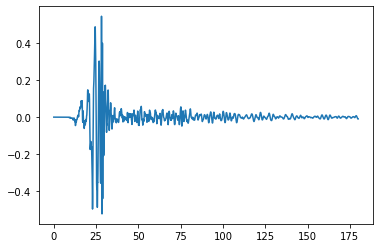

In [175]:
plt.plot(df.Time,df.w)

In [176]:
af = df
af.head()

,Time,u,v,w,x1,x2,x3
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,630893.0,7357970.0,0.0
1,0.1,0.000000e+00,0.000000e+00,0.000000e+00,630893.0,7357970.0,0.0
2,0.2,0.000000e+00,0.000000e+00,0.000000e+00,630893.0,7357970.0,0.0
3,0.3,1.658069e-132,5.827383e-132,-1.062238e-131,630893.0,7357970.0,0.0
4,0.4,6.498836e-97,2.962924e-96,-1.470703e-96,630893.0,7357970.0,0.0


In [177]:
# need to adjust time due to floating point errors/ rounding
df["Time"] = np.linspace(0, 179.9, 1800)
df.loc[df['Time'] == 40.0]

,Time,u,v,w,x1,x2,x3
400,40.0,-0.000139,-0.000992,0.040711,630893.0,7357970.0,0.0


In [181]:
for i in range (36,37):
    print(i)

36


In [230]:
# Attempt of for loop
for i in range (115,118):
    ndir = directory+"HFFZ_fullycp-receiver-00{}-00014.dat".format(i)
    frame = pd.read_csv(ndir, skiprows=5, sep='\s+', names=column_names)
    frame.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    coords = pd.read_csv(ndir, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    frame["x1"]=x1
    frame["x2"]=x2
    frame["x3"]=x3
    print(x1)
    if (i==115):
        stack = frame.loc[df['Time'] == 40.0]
    else:
        stack = pd.concat([stack, frame.loc[df['Time'] == 40.0]])

625454.0
625565.0
625676.0


In [231]:
stack

,Time,u,v,w,x1,x2,x3
400,40.0,-0.015607,-0.029810,0.001879,625454.0,7348660.0,0.0
400,40.0,-0.014094,-0.027315,0.011928,625565.0,7348850.0,0.0
400,40.0,-0.012441,-0.025009,0.017676,625676.0,7349040.0,0.0


In [236]:
files = glob.glob(os.path.join(directory, "HFFZ_fullycp-receiver*.dat"))

In [238]:
for f in files:
    frame = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    frame.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    frame["x1"]=x1
    frame["x2"]=x2
    frame["x3"]=x3
    if (i==115):
        stack = frame.loc[df['Time'] == 40.0]
    else:
        stack = pd.concat([stack, frame.loc[df['Time'] == 40.0]])

In [239]:
stack

,Time,u,v,w,x1,x2,x3
400,40.0,-0.015607,-0.029810,0.001879,625454.0,7348660.0,0.0
400,40.0,-0.014094,-0.027315,0.011928,625565.0,7348850.0,0.0
400,40.0,-0.012441,-0.025009,0.017676,625676.0,7349040.0,0.0
400,40.0,-0.000074,-0.000513,0.022183,633668.0,7362720.0,0.0
400,40.0,-0.001873,-0.000667,0.009030,617018.0,7334220.0,0.0
...,...,...,...,...,...,...,...
400,40.0,-0.000689,-0.001304,0.044148,632003.0,7359870.0,0.0
400,40.0,0.000174,0.000061,-0.002565,634778.0,7364620.0,0.0
400,40.0,-0.003925,-0.002917,0.011611,619460.0,7338400.0,0.0
400,40.0,-0.024933,-0.033975,0.029494,623456.0,7345240.0,0.0


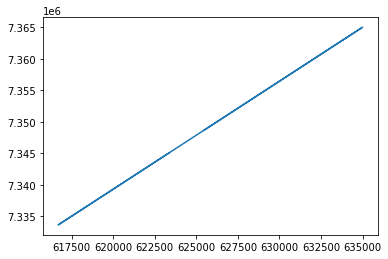

In [242]:
plt.plot(stack.x1,stack.x2)